In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('penguins.csv')
dataset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [3]:
dataset['gender'] = [0 if gender =='female' else 1 for gender in dataset['gender']]

In [4]:
adelie = dataset[dataset['species']=='Adelie']
chinstrap = dataset[dataset['species']=='Chinstrap']
gentoo = dataset[dataset['species']=='Gentoo']
features = dataset.columns.tolist()
features.remove('species')

In [5]:
def drawLinearityBetweenFeatures(featureOne,featureTwo):
    plt.scatter(adelie[featureOne],adelie[featureTwo], c="red")
    plt.scatter(chinstrap[featureOne],chinstrap[featureTwo], c= "black")
    plt.scatter(gentoo[featureOne],gentoo[featureTwo], c= "blue")
    plt.xlabel(featureOne)
    plt.ylabel(featureTwo)
    plt.legend(['adelie','chinstrap','gentoo'],loc="upper right",fontsize=8.5)
    plt.show()

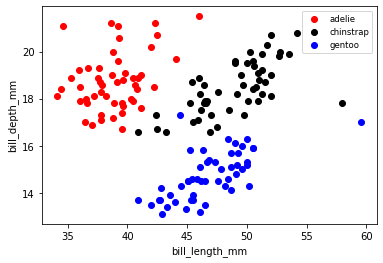

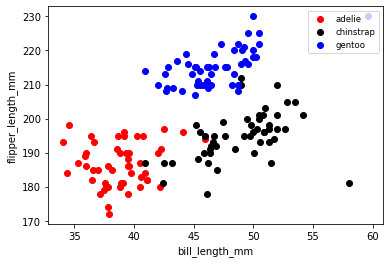

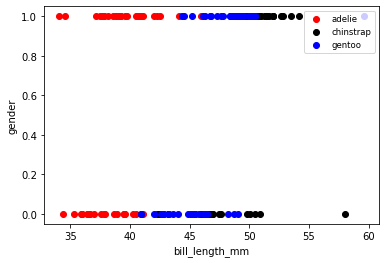

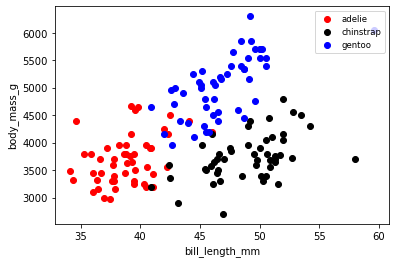

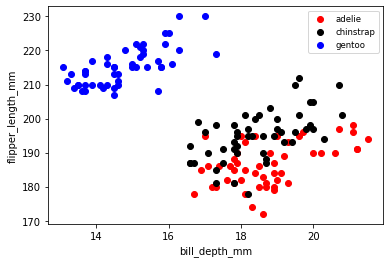

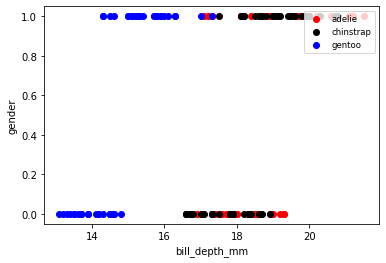

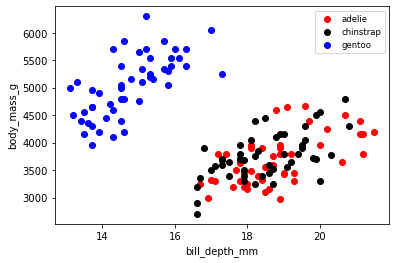

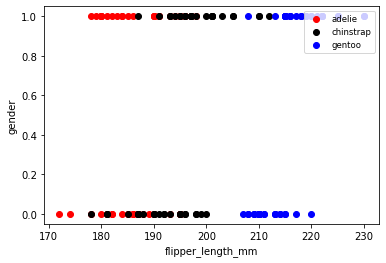

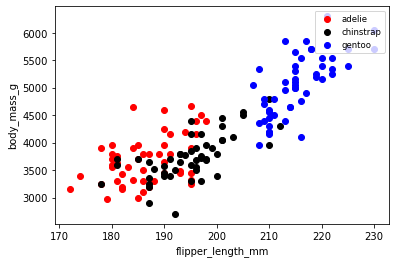

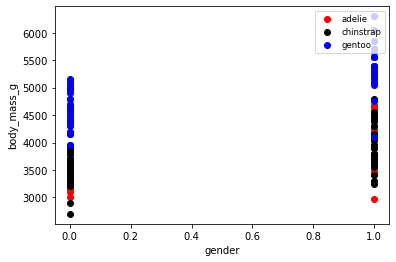

In [6]:
for feature in range(len(features)):
    for nextFeature in range (feature+1, len(features)):
        drawLinearityBetweenFeatures(features[feature],features[nextFeature])